<a href="https://colab.research.google.com/github/jpmslima/tutoriais/blob/main/GeoR_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados a partir do GEO, usando R/Colab

**Observações:**

- Este notebook foi adaptado para o português brasileiro a partir do tutorial descrito por Mark Dunning, versão original disponível [AQUI](https://sbc.shef.ac.uk/geo_tutorial/tutorial.nb.html). Qualquer citação deve ser direcionada ao tutorial original.
- A reprodução sem a citação ao tutorial/autor principal não é permitida.

## Introdução

Neste tutorial, demonstraremos como baixar dados do *Gene Expression Omnibus* diretamente no R. Uma vez carregados, realizaremos algumas avaliações de qualidade, expressão diferencial e análises subsequentes, como agrupamento. Os grupos de dados ou séries devem ter sido geradas por *microarrays*. Para dados de transcriptoma por RNA-Seq, utilize esse [Tutorial](https://bioinformatics-core-shared-training.github.io/RNAseq-R/).

Ilustraremos as principais etapas do fluxo de trabalho. No entanto, algumas etapas podem precisar ser ajustadas para sua análise específica (por exemplo, alterando o modelo para a expressão diferencial).

> **ATENÇÃO:**
>
>*Este notebook foi feito para que as células sejam executadas individualmente. Nunca execute tudo, pois algumas etapas são opcionais, dependendo dos seus dados. Os comandos opcionais foram comentados para evitar execução não intencional. Leia todo o texto antes de executar cada célula de código.*

### Instalando os pacotes necessários:

A instalação é um pouco demorada (cerca de 20 min.), mas as análises são relativamente rápidas. O ambiente R do Colab já vem com vários pacotes padrões instalados, inclusive com alguns que iremos precisar aqui. Se você desejar que a instalação seja mais rápida, execute o comando `library()`, verifique as bibliotecas que já existem e comente as linhas relativas à sua instalação na célula abaixo.

In [1]:
install.packages("BiocManager")
install.packages("forcats")
install.packages("stringr")
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("readr")
install.packages("tidyr")
install.packages("survminer")
BiocManager::install("GEOquery")
BiocManager::install("limma")
BiocManager::install("pheatmap")
BiocManager::install("org.Hs.eg.db")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘

## Escolhendo o dado do *Gene Expression Series*

Vamos supor que você já saiba o número de acesso (GSE) para o conjunto de dados que deseja baixar.

A função para baixar um conjunto de dados GEO é `getGEO` do pacote `GEOquery`. Você precisa especificar o ID do conjunto de dados que deseja. Para baixar seus próprios dados, substitua GSE33126 pelo ID que lhe interessa.

> *Não esqueça de trocar o acesso GSE, após a variável `my_id`.*

In [2]:
library(GEOquery)
## change my_id to be the dataset that you want.
my_id <- "GSE20602"
gse <- getGEO(my_id)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

Found 1 file(s)

GSE20602_series_matrix.txt.gz

Alguns conjuntos de dados no GEO podem ser derivados de diferentes plataformas de *microarray*. Portanto, o objeto gse é uma lista de diferentes conjuntos de dados. Você pode descobrir quantos foram usados verificando o comprimento do objeto gse. Geralmente, haverá apenas uma plataforma e o conjunto de dados que queremos analisar será o primeiro objeto na lista (gse[[1]]).

#### Checando as plataformas que foram utilizadas:



In [3]:
length(gse)

[1] 1

### Escolhendo uma ou mais plataformas:

In [4]:
gse <- gse[[1]]
gse
## if more than one dataset is present, you can analyse the other dataset by changing the number inside the [[...]]
## e.g. gse <- gse[[2]]

ExpressionSet (storageMode: lockedEnvironment)
assayData: 22283 features, 18 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM517355 GSM517356 ... GSM517372 (18 total)
  varLabels: title geo_accession ... tissue:ch1 (35 total)
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (22283 total)
  fvarLabels: ID GB_ACC ... Gene Ontology Molecular Function (16 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 20019191 
Annotation: GPL96 

#### Obtendo informações sobre o estudo:

Informação das Amostras

In [5]:
pData(gse) ## print the sample information

title        geo_accession status                submission_date
GSM517355 NSC1         GSM517355     Public on Mar 30 2010 Mar 02 2010    
GSM517356 NSC2         GSM517356     Public on Mar 30 2010 Mar 02 2010    
GSM517357 NSC4         GSM517357     Public on Mar 30 2010 Mar 02 2010    
GSM517358 NSC5         GSM517358     Public on Mar 30 2010 Mar 02 2010    
GSM517359 NSC6         GSM517359     Public on Mar 30 2010 Mar 02 2010    
GSM517360 NSC7         GSM517360     Public on Mar 30 2010 Mar 02 2010    
GSM517361 NSC8         GSM517361     Public on Mar 30 2010 Mar 02 2010    
GSM517362 NSC11        GSM517362     Public on Mar 30 2010 Mar 02 2010    
GSM517363 NSC12        GSM517363     Public on Mar 30 2010 Mar 02 2010    
GSM517364 NSC13        GSM517364     Public on Mar 30 2010 Mar 02 2010    
GSM517365 NSC14        GSM517365     Public on Mar 30 2010 Mar 02 2010    
GSM517366 NSC15        GSM517366     Public on Mar 30 2010 Mar 02 2010    
GSM517367 NSC16        GSM517367     Public on Mar 30 2010 Mar 02 2010    
GSM517368 NSC18        GSM517368     Public on Mar 30 2010 Mar 02 2010    
GSM517369 TN1b-control GSM517369     Public on Mar 30 2010 Mar 02 2010    
GSM517370 TN2b-control GSM517370     Public on Mar 30 2010 Mar 02 2010    
GSM517371 TN3b-control GSM517371     Public on Mar 30 2010 Mar 02 2010    
GSM517372 TN4b-control GSM517372     Public on Mar 30 2010 Mar 02 2010    
          last_update_date type channel_count
GSM517355 Mar 16 2010      RNA  1            
GSM517356 Mar 16 2010      RNA  1            
GSM517357 Mar 16 2010      RNA  1            
GSM517358 Mar 16 2010      RNA  1            
GSM517359 Mar 16 2010      RNA  1            
GSM517360 Mar 16 2010      RNA  1            
GSM517361 Mar 16 2010      RNA  1            
GSM517362 Mar 16 2010      RNA  1            
GSM517363 Mar 16 2010      RNA  1            
GSM517364 Mar 16 2010      RNA  1            
GSM517365 Mar 16 2010      RNA  1            
GSM517366 Mar 16 2010      RNA  1            
GSM517367 Mar 16 2010      RNA  1            
GSM517368 Mar 16 2010      RNA  1            
GSM517369 Mar 16 2010      RNA  1            
GSM517370 Mar 16 2010      RNA  1            
GSM517371 Mar 16 2010      RNA  1            
GSM517372 Mar 16 2010      RNA  1            
          source_name_ch1                                    organism_ch1
GSM517355 kidney biopsy from patient with NSC                Homo sapiens
GSM517356 kidney biopsy from patient with NSC                Homo sapiens
GSM517357 kidney biopsy from patient with NSC                Homo sapiens
GSM517358 kidney biopsy from patient with NSC                Homo sapiens
GSM517359 kidney biopsy from patient with NSC                Homo sapiens
GSM517360 kidney biopsy from patient with NSC                Homo sapiens
GSM517361 kidney biopsy from patient with NSC                Homo sapiens
GSM517362 kidney biopsy from patient with NSC                Homo sapiens
GSM517363 kidney biopsy from patient with NSC                Homo sapiens
GSM517364 kidney biopsy from patient with NSC                Homo sapiens
GSM517365 kidney biopsy from patient with NSC                Homo sapiens
GSM517366 kidney biopsy from patient with NSC                Homo sapiens
GSM517367 kidney biopsy from patient with NSC                Homo sapiens
GSM517368 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517369 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517370 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517371 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517372 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
          characteristics_ch1               ⋯ contact_institute     
GSM517355 tissue: glomeruli of human kidney ⋯ University of Michigan
GSM517356 tissue: glomeruli of human kidney ⋯ University of Michigan
GSM517357 tissue: glomeruli of human kidney ⋯ University of Michigan
GSM517358 tissue: glomeruli o

Anotação dos genes:

In [6]:
fData(gse) ## print the gene annotation

ID                       GB_ACC    SPOT_ID  
1007_s_at                1007_s_at                U48705             
1053_at                  1053_at                  M87338             
117_at                   117_at                   X51757             
121_at                   121_at                   X69699             
1255_g_at                1255_g_at                L36861             
1294_at                  1294_at                  L13852             
1316_at                  1316_at                  X55005             
1320_at                  1320_at                  X79510             
1405_i_at                1405_i_at                M21121             
1431_at                  1431_at                  J02843             
1438_at                  1438_at                  X75208             
1487_at                  1487_at                  L38487             
1494_f_at                1494_f_at                M33318             
1598_g_at                1598_g_at                L13720             
160020_at                160020_at                Z48481             
1729_at                  1729_at                  L41690             
1773_at                  1773_at                  L00635             
177_at                   177_at                   U38545             
179_at                   179_at                   U38980             
1861_at                  1861_at                  U66879             
200000_s_at              200000_s_at              NM_006445          
200001_at                200001_at                NM_001749          
200002_at                200002_at                NM_007209          
200003_s_at              200003_s_at              NM_000991          
200004_at                200004_at                NM_001418          
200005_at                200005_at                NM_003753          
200006_at                200006_at                NM_007262          
200007_at                200007_at                NM_003134          
200008_s_at              200008_s_at              D13988             
200009_at                200009_at                NM_001494          
⋮                        ⋮                        ⋮         ⋮        
AFFX-r2-Bs-lys-3_at      AFFX-r2-Bs-lys-3_at                --Control
AFFX-r2-Bs-lys-5_at      AFFX-r2-Bs-lys-5_at                --Control
AFFX-r2-Bs-lys-M_at      AFFX-r2-Bs-lys-M_at                --Control
AFFX-r2-Bs-phe-3_at      AFFX-r2-Bs-phe-3_at                --Control
AFFX-r2-Bs-phe-5_at      AFFX-r2-Bs-phe-5_at                --Control
AFFX-r2-Bs-phe-M_at      AFFX-r2-Bs-phe-M_at                --Control
AFFX-r2-Bs-thr-3_s_at    AFFX-r2-Bs-thr-3_s_at              --Control
AFFX-r2-Bs-thr-5_s_at    AFFX-r2-Bs-thr-5_s_at              --Control
AFFX-r2-Bs-thr-M_s_at    AFFX-r2-Bs-thr-M_s_at              --Control
AFFX-r2-Ec-bioB-3_at     AFFX-r2-Ec-bioB-3_at               --Control
AFFX-r2-Ec-bioB-5_at     AFFX-r2-Ec-bioB-5_at               --Control
AFFX-r2-Ec-bioB-M_at     AFFX-r2-Ec-bioB-M_at               --Control
AFFX-r2-Ec-bioC-3_at     AFFX-r2-Ec-bioC-3_at               --Control
AFFX-r2-Ec-bioC-5_at     AFFX-r2-Ec-bioC-5_at               --Control
AFFX-r2-Ec-bioD-3_at     AFFX-r2-Ec-bioD-3_at               --Control
AFFX-r2-Ec-bioD-5_at     AFFX-r2-Ec-bioD-5_at               --Control
AFFX-r2-Hs18SrRNA-3_s_at AFFX-r2-Hs18SrRNA-3_s_at           --Control
AFFX-r2-Hs18SrRNA-5_at   AFFX-r2-Hs18SrRNA-5_at             --Control
AFFX-r2-Hs18SrRNA-M_x_at AFFX-r2-Hs18SrRNA-M_x_at           --Control
AFFX-r2-Hs28SrRNA-3_at   AFFX-r2-Hs28SrRNA-3_at             --Control
AFFX-r2-Hs28SrRNA-5_at   AFFX-r2-Hs28SrRNA-5_at             --Control
AFFX-r2-Hs28SrRNA-M_at   AFFX-r2-Hs28SrRNA-M_at             --Control
AFFX-r2-P1-cre-3_at      AFFX-r2-P1-cre-3_at                --Control
AFFX-r2-P1-cre-5_at      AFFX-r2-P1-cre-5_at                --Control
AFFX-ThrX-3_at           AFFX-ThrX-3_at                     --Control
AFFX-ThrX-5_at           AFFX-ThrX-

Dados de expressão:

In [7]:
exprs(gse) ## print the expression data

GSM517355 GSM517356 GSM517357 GSM517358 GSM517359
1007_s_at                11.007402 11.007287 11.043006 10.996446 10.655054
1053_at                   7.173564  7.027160  7.022269  6.965315  7.018888
117_at                    7.031011  7.047853  7.013883  7.046787  6.952204
121_at                   10.395251 10.478962 10.569338 10.519554 10.393992
1255_g_at                 4.569596  4.576886  4.674495  4.695978  4.567270
1294_at                   9.406246  9.145071  9.065041  9.056060  9.004434
1316_at                   5.973047  5.955183  6.069703  5.972298  5.860130
1320_at                   6.087714  6.006613  6.120106  6.102750  5.958276
1405_i_at                 6.959957  7.347901  6.159402  6.690479  7.515492
1431_at                   4.244689  4.336719  4.414026  4.398323  4.214774
1438_at                   6.883202  6.929815  7.135364  6.808822  6.751570
1487_at                   8.230784  8.186622  8.419460  8.129762  8.103970
1494_f_at                 7.053525  7.139666  7.407389  7.258854  7.105018
1598_g_at                12.215415 12.123363 12.380598 12.892961 11.979375
160020_at                 8.052361  8.056665  8.182862  8.061659  7.848398
1729_at                   9.591338  9.376608  9.616613  9.422447  9.392860
1773_at                   6.739124  6.675804  7.027275  7.082733  6.888226
177_at                    6.178454  6.247164  6.328351  6.046027  6.209823
179_at                    9.306644  9.402403  9.433789  9.381230  9.274354
1861_at                   7.904138  7.967673  8.180393  7.696362  7.738321
200000_s_at              10.215801 10.316860 10.166048 10.106710  9.989174
200001_at                11.897683 11.838488 12.044280 12.196776 11.887505
200002_at                11.956405 12.064842 11.702699 11.525110 11.784560
200003_s_at              12.520454 12.681557 12.304084 12.116797 12.325287
200004_at                12.240307 12.185614 12.312434 12.268242 12.320176
200005_at                11.000521 10.930898 10.852791 10.689009 10.680919
200006_at                13.149284 12.955397 13.001682 12.844398 12.911479
200007_at                13.006558 12.679187 12.889744 12.724710 12.577010
200008_s_at               9.049877  8.979586  9.195464  9.739794  9.412815
200009_at                12.233796 12.213737 12.100437 12.164660 12.104768
⋮                        ⋮         ⋮         ⋮         ⋮         ⋮        
AFFX-r2-Bs-lys-3_at       4.277688  4.442093  4.366643  4.351727  4.006669
AFFX-r2-Bs-lys-5_at       4.120895  4.167664  4.089866  4.034924  4.075791
AFFX-r2-Bs-lys-M_at       3.919975  4.010946  4.048588  3.949641  3.936008
AFFX-r2-Bs-phe-3_at       4.656184  4.723920  4.816903  4.782017  4.618999
AFFX-r2-Bs-phe-5_at       4.073264  4.130464  4.078444  3.845516  3.943184
AFFX-r2-Bs-phe-M_at       4.387912  4.071624  4.199333  4.145499  4.071322
AFFX-r2-Bs-thr-3_s_at     5.197300  5.674726  5.372602  5.468775  5.402297
AFFX-r2-Bs-thr-5_s_at     5.077045  5.076434  5.181660  5.355592  4.840161
AFFX-r2-Bs-thr-M_s_at     4.437933  4.451661  4.482858  4.519813  4.420852
AFFX-r2-Ec-bioB-3_at      8.047781  8.153446  8.116499  7.693119  7.943071
AFFX-r2-Ec-bioB-5_at      8.230761  8.194799  8.197578  7.678955  8.066175
AFFX-r2-Ec-bioB-M_at      8.958636  9.108769  8.951393  8.709438  8.839839
AFFX-r2-Ec-bioC-3_at      9.575799  9.734992  9.630954  9.211387  9.385077
AFFX-r2-Ec-bioC-5_at      9.418257  9.577494  9.503342  9.187195  9.381857
AFFX-r2-Ec-bioD-3_at     11.464297 11.523765 11.536165 11.175985 11.355466
AFFX-r2-Ec-bioD-5_at     11.196742 11.234198 11.110977 10.811900 11.161572
AFFX-r2-Hs18SrRNA-3_s_at 12.028475 12.255207 11.983046 11.475647 12.322378
AFFX-r2-Hs18SrRNA-5_at   13.414840 13.331337 13.396196 12.957517 13.442887
AFFX-r2-Hs18SrRNA-M_x_at 13.472040 13.276176 13.325544 12.818389 13.508747
AFFX-r2-Hs28SrRNA-3_at   11.730181 11.595585 11.530255 11.230493 11.404538
AFFX-r2-Hs28SrRNA-5_at    9.260561  9.041231  9.115971  8.573927  8.543708
AFFX-r2-Hs28SrRNA-M_at   10.924947 10.693254 10.56

## Verificando a normalização e as escalas usadas
Para visualização e análise estatística, vamos inspecionar os dados para descobrir em que escala os dados são apresentados. Os métodos que usaremos assumem que os dados estão em uma escala log2, tipicamente na faixa de 0 a 16.

A função `exprs` pode recuperar os valores de expressão como um quadro de dados; com uma coluna por amostra e uma linha por gene.

A função `summary` pode então ser usada para imprimir as distribuições.

In [8]:
## exprs get the expression levels as a data frame and get the distribution
summary(exprs(gse))

   GSM517355        GSM517356        GSM517357        GSM517358     
 Min.   : 3.597   Min.   : 3.616   Min.   : 3.630   Min.   : 3.660  
 1st Qu.: 5.870   1st Qu.: 5.888   1st Qu.: 5.952   1st Qu.: 5.914  
 Median : 7.252   Median : 7.261   Median : 7.271   Median : 7.258  
 Mean   : 7.509   Mean   : 7.502   Mean   : 7.529   Mean   : 7.507  
 3rd Qu.: 8.996   3rd Qu.: 8.946   3rd Qu.: 8.930   3rd Qu.: 8.922  
 Max.   :14.394   Max.   :14.425   Max.   :14.390   Max.   :14.436  
   GSM517359        GSM517360        GSM517361        GSM517362     
 Min.   : 3.632   Min.   : 3.639   Min.   : 3.556   Min.   : 3.526  
 1st Qu.: 5.842   1st Qu.: 5.916   1st Qu.: 5.885   1st Qu.: 5.833  
 Median : 7.255   Median : 7.274   Median : 7.266   Median : 7.249  
 Mean   : 7.495   Mean   : 7.503   Mean   : 7.503   Mean   : 7.496  
 3rd Qu.: 8.971   3rd Qu.: 8.911   3rd Qu.: 8.950   3rd Qu.: 8.984  
 Max.   :14.435   Max.   :14.397   Max.   :14.395   Max.   :14.412  
   GSM517363        GSM517364     

Um boxplot também pode ser gerado para ver se os dados foram normalizados. Se sim, as distribuições de cada amostra devem ser muito semelhantes.

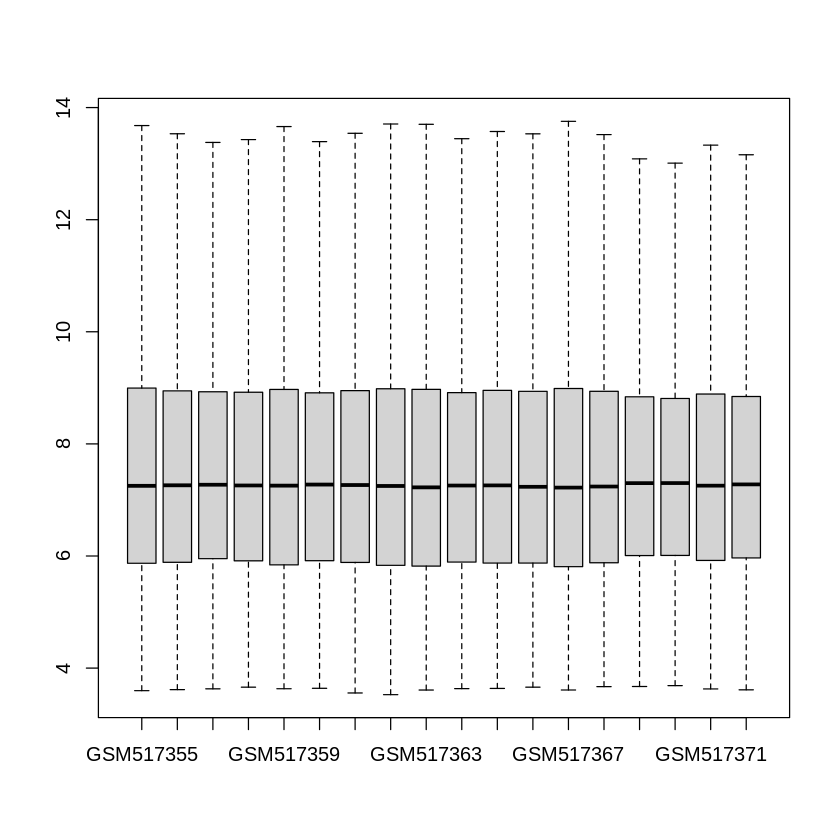

In [9]:
boxplot(exprs(gse),outline=FALSE)

Verifique se os valores vão muito além de 16. Se sim, precisaremos realizar uma transformação Log2.

**Só execute a célula abaixo se for o caso. Para o *dataset* exemplo ela não é necessária.**

In [10]:
# exprs(gse) <- log2(exprs(gse))

### Inspecionando as variáveis clínicas

Os dados enviados para o GEO contêm rótulos de amostras atribuídos pelos grupos de pesquisa e algumas informações sobre o protocolo de processamento. Todos esses dados podem ser extraídos pela função `pData`.

Para seus próprios dados, você terá que decidir quais colunas serão úteis na análise. Isso incluirá a coluna que fornece as comparações de interesse e quaisquer fatores confundidores potenciais. Neste conjunto de dados específico, parece que são `source_name_ch1` e `disease state:ch1`.

Podemos usar a função select do `dplyr` para exibir apenas essas colunas de interesse. Nesta fase, também será útil renomear as colunas para algo mais conveniente usando a função `rename`. No caso exemplo, utilizaremos `Sample` e `State`.

In [13]:
library(dplyr)
sampleInfo <- pData(gse)
sampleInfo


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




title        geo_accession status                submission_date
GSM517355 NSC1         GSM517355     Public on Mar 30 2010 Mar 02 2010    
GSM517356 NSC2         GSM517356     Public on Mar 30 2010 Mar 02 2010    
GSM517357 NSC4         GSM517357     Public on Mar 30 2010 Mar 02 2010    
GSM517358 NSC5         GSM517358     Public on Mar 30 2010 Mar 02 2010    
GSM517359 NSC6         GSM517359     Public on Mar 30 2010 Mar 02 2010    
GSM517360 NSC7         GSM517360     Public on Mar 30 2010 Mar 02 2010    
GSM517361 NSC8         GSM517361     Public on Mar 30 2010 Mar 02 2010    
GSM517362 NSC11        GSM517362     Public on Mar 30 2010 Mar 02 2010    
GSM517363 NSC12        GSM517363     Public on Mar 30 2010 Mar 02 2010    
GSM517364 NSC13        GSM517364     Public on Mar 30 2010 Mar 02 2010    
GSM517365 NSC14        GSM517365     Public on Mar 30 2010 Mar 02 2010    
GSM517366 NSC15        GSM517366     Public on Mar 30 2010 Mar 02 2010    
GSM517367 NSC16        GSM517367     Public on Mar 30 2010 Mar 02 2010    
GSM517368 NSC18        GSM517368     Public on Mar 30 2010 Mar 02 2010    
GSM517369 TN1b-control GSM517369     Public on Mar 30 2010 Mar 02 2010    
GSM517370 TN2b-control GSM517370     Public on Mar 30 2010 Mar 02 2010    
GSM517371 TN3b-control GSM517371     Public on Mar 30 2010 Mar 02 2010    
GSM517372 TN4b-control GSM517372     Public on Mar 30 2010 Mar 02 2010    
          last_update_date type channel_count
GSM517355 Mar 16 2010      RNA  1            
GSM517356 Mar 16 2010      RNA  1            
GSM517357 Mar 16 2010      RNA  1            
GSM517358 Mar 16 2010      RNA  1            
GSM517359 Mar 16 2010      RNA  1            
GSM517360 Mar 16 2010      RNA  1            
GSM517361 Mar 16 2010      RNA  1            
GSM517362 Mar 16 2010      RNA  1            
GSM517363 Mar 16 2010      RNA  1            
GSM517364 Mar 16 2010      RNA  1            
GSM517365 Mar 16 2010      RNA  1            
GSM517366 Mar 16 2010      RNA  1            
GSM517367 Mar 16 2010      RNA  1            
GSM517368 Mar 16 2010      RNA  1            
GSM517369 Mar 16 2010      RNA  1            
GSM517370 Mar 16 2010      RNA  1            
GSM517371 Mar 16 2010      RNA  1            
GSM517372 Mar 16 2010      RNA  1            
          source_name_ch1                                    organism_ch1
GSM517355 kidney biopsy from patient with NSC                Homo sapiens
GSM517356 kidney biopsy from patient with NSC                Homo sapiens
GSM517357 kidney biopsy from patient with NSC                Homo sapiens
GSM517358 kidney biopsy from patient with NSC                Homo sapiens
GSM517359 kidney biopsy from patient with NSC                Homo sapiens
GSM517360 kidney biopsy from patient with NSC                Homo sapiens
GSM517361 kidney biopsy from patient with NSC                Homo sapiens
GSM517362 kidney biopsy from patient with NSC                Homo sapiens
GSM517363 kidney biopsy from patient with NSC                Homo sapiens
GSM517364 kidney biopsy from patient with NSC                Homo sapiens
GSM517365 kidney biopsy from patient with NSC                Homo sapiens
GSM517366 kidney biopsy from patient with NSC                Homo sapiens
GSM517367 kidney biopsy from patient with NSC                Homo sapiens
GSM517368 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517369 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517370 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517371 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
GSM517372 kidney biopsy from patient after Tumor Nephrectomy Homo sapiens
          characteristics_ch1               ⋯ contact_institute     
GSM517355 tissue: glomeruli of human kidney ⋯ University of Michigan
GSM517356 tissue: glomeruli of human kidney ⋯ University of Michigan
GSM517357 tissue: glomeruli of human kidney ⋯ University of Michigan
GSM517358 tissue: glomeruli o

In [14]:
# source_name_ch1 and disease state:ch1 seem to contain factors we might need for the analysis. Let's pick just those columns
sampleInfo <- select(sampleInfo, "source_name_ch1","disease state:ch1")
sampleInfo

source_name_ch1                                    disease state:ch1
GSM517355 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517356 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517357 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517358 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517359 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517360 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517361 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517362 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517363 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517364 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517365 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517366 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517367 kidney biopsy from patient with NSC                nephrosclerosis  
GSM517368 kidney biopsy from patient after Tumor Nephrectomy nephrosclerosis  
GSM517369 kidney biopsy from patient after Tumor Nephrectomy control          
GSM517370 kidney biopsy from patient after Tumor Nephrectomy control          
GSM517371 kidney biopsy from patient after Tumor Nephrectomy control          
GSM517372 kidney biopsy from patient after Tumor Nephrectomy control

In [15]:
## Optionally, rename to more convenient column names
sampleInfo <- rename(sampleInfo, "Sample"="source_name_ch1", "State"="disease state:ch1")

A informação da amostra então ficará assim:

In [16]:
sampleInfo

Sample                                             State          
GSM517355 kidney biopsy from patient with NSC                nephrosclerosis
GSM517356 kidney biopsy from patient with NSC                nephrosclerosis
GSM517357 kidney biopsy from patient with NSC                nephrosclerosis
GSM517358 kidney biopsy from patient with NSC                nephrosclerosis
GSM517359 kidney biopsy from patient with NSC                nephrosclerosis
GSM517360 kidney biopsy from patient with NSC                nephrosclerosis
GSM517361 kidney biopsy from patient with NSC                nephrosclerosis
GSM517362 kidney biopsy from patient with NSC                nephrosclerosis
GSM517363 kidney biopsy from patient with NSC                nephrosclerosis
GSM517364 kidney biopsy from patient with NSC                nephrosclerosis
GSM517365 kidney biopsy from patient with NSC                nephrosclerosis
GSM517366 kidney biopsy from patient with NSC                nephrosclerosis
GSM517367 kidney biopsy from patient with NSC                nephrosclerosis
GSM517368 kidney biopsy from patient after Tumor Nephrectomy nephrosclerosis
GSM517369 kidney biopsy from patient after Tumor Nephrectomy control        
GSM517370 kidney biopsy from patient after Tumor Nephrectomy control        
GSM517371 kidney biopsy from patient after Tumor Nephrectomy control        
GSM517372 kidney biopsy from patient after Tumor Nephrectomy control

A classificação das amostras na coluna `Sample` é dada por termos muito grandes. Vamos resumir, usando a biblioteca `dplyr`, nas seguintes condições:
- Renomear "kidney biopsy from patient with NSC" para apenas "NSC"
- Renomear "kidney biopsy from patient after Tumor Nephrectomy" para apenas "aTN".
Assim os dados ficam mais fáceis de serem analisados, tanto para a PCA, como para os *heatmaps*.

In [18]:
sampleInfo <- sampleInfo %>%
    mutate(Sample = case_when(
        Sample == "kidney biopsy from patient with NSC" ~ "NSC",
        Sample == "kidney biopsy from patient after Tumor Nephrectomy" ~ "aTN",
        TRUE ~ Sample
    ))
sampleInfo

Sample State          
GSM517355 NSC    nephrosclerosis
GSM517356 NSC    nephrosclerosis
GSM517357 NSC    nephrosclerosis
GSM517358 NSC    nephrosclerosis
GSM517359 NSC    nephrosclerosis
GSM517360 NSC    nephrosclerosis
GSM517361 NSC    nephrosclerosis
GSM517362 NSC    nephrosclerosis
GSM517363 NSC    nephrosclerosis
GSM517364 NSC    nephrosclerosis
GSM517365 NSC    nephrosclerosis
GSM517366 NSC    nephrosclerosis
GSM517367 NSC    nephrosclerosis
GSM517368 aTN    nephrosclerosis
GSM517369 aTN    control        
GSM517370 aTN    control        
GSM517371 aTN    control        
GSM517372 aTN    control

## Clusterização das amostras e Análise de Componentes Principais (PCA)

A análise não supervisionada é uma boa maneira de entender as fontes de variação nos dados. Ela também pode identificar possíveis amostras discrepantes (os chamados "*outliers*".

A função `cor` pode calcular a correlação (na escala de 0 - 1) de maneira par a par entre todas as amostras. Isso pode ser visualizado em um *heatmap*. Entre as muitas opções para criar *heatmaps* em R, a biblioteca `pheatmap` é uma das mais populares. O único argumento que ela requer é uma matriz de valores numéricos (como a matriz de correlação).

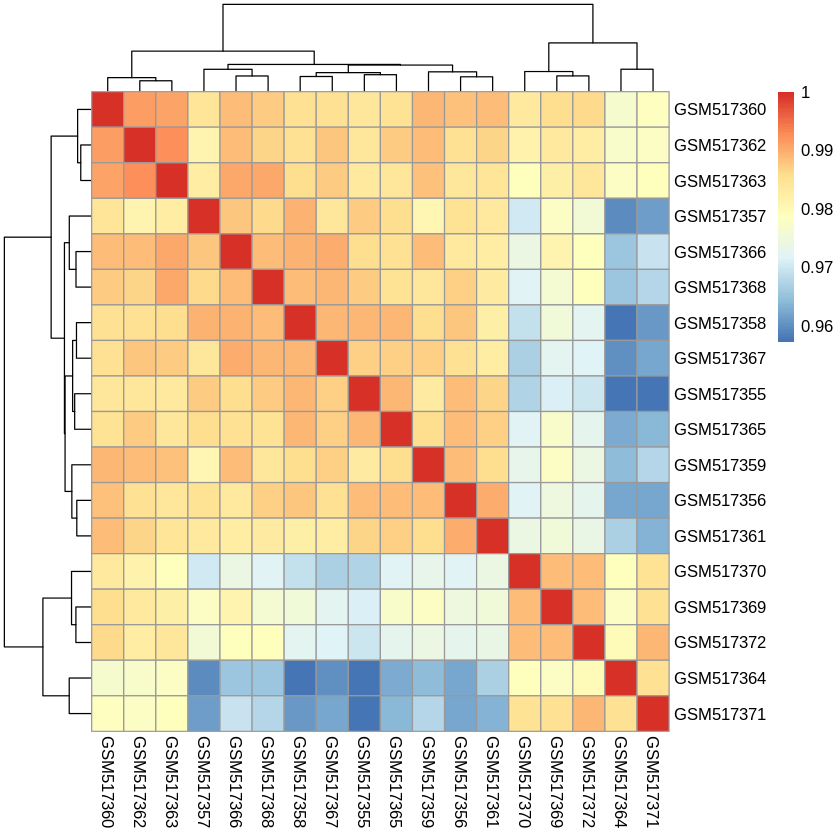

In [19]:
library(pheatmap)
## argument use="c" stops an error if there are any missing data points

corMatrix <- cor(exprs(gse),use="c")
pheatmap(corMatrix)

Podemos incorporar informações da amostra no gráfico para tentar entender o agrupamento. Já criamos um quadro de dados assim anteriormente (sampleInfo). No entanto, precisamos ter cuidado para que os nomes das linhas desses dados correspondam às colunas da matriz de correlação.

In [20]:
## Print the rownames of the sample information and check it matches the correlation matrix
rownames(sampleInfo)

[1] "GSM517355" "GSM517356" "GSM517357" "GSM517358" "GSM517359" "GSM517360"
 [7] "GSM517361" "GSM517362" "GSM517363" "GSM517364" "GSM517365" "GSM517366"
[13] "GSM517367" "GSM517368" "GSM517369" "GSM517370" "GSM517371" "GSM517372"

In [21]:
colnames(corMatrix)

[1] "GSM517355" "GSM517356" "GSM517357" "GSM517358" "GSM517359" "GSM517360"
 [7] "GSM517361" "GSM517362" "GSM517363" "GSM517364" "GSM517365" "GSM517366"
[13] "GSM517367" "GSM517368" "GSM517369" "GSM517370" "GSM517371" "GSM517372"

Se não estiverem iguais, execute o código abaixo. Se estiverem iguais, pode passar para a próxima etapa.

In [ ]:
## If not, force the rownames to match the columns

# rownames(sampleInfo) <- colnames(corMatrix)

Se estiverem iguais, apenas confirme, obtendo o heatmap:

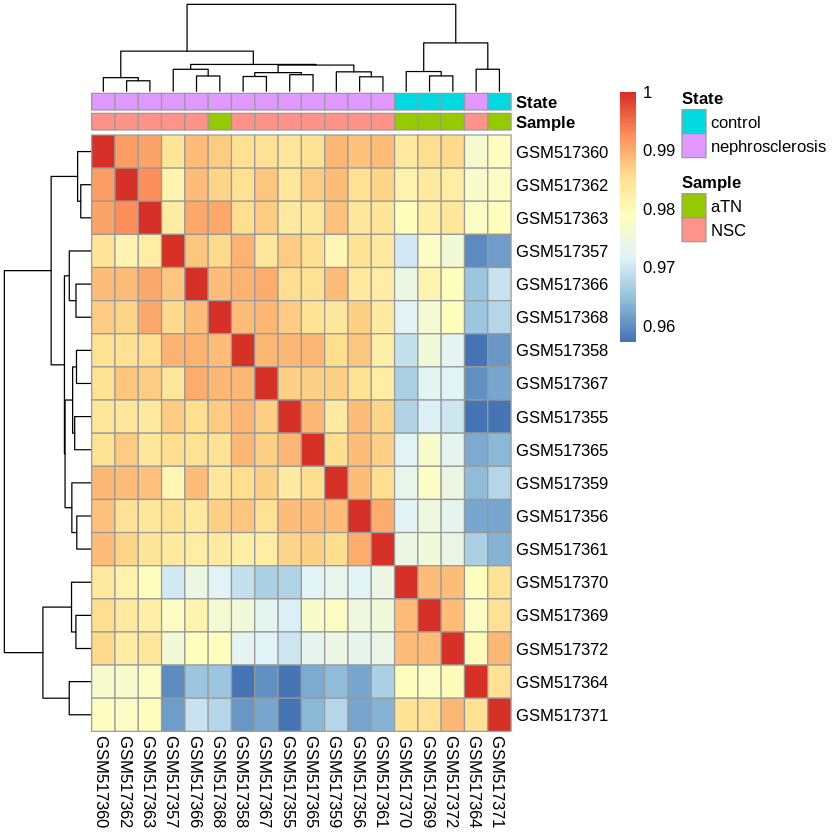

In [22]:
pheatmap(corMatrix,
         annotation_col=sampleInfo)

Aqui vemos que a principal separação é devido a Control vs Nephrosclerosis; como esperamos, com uma pequena diferença.

Uma abordagem complementar é usar a Análise de Componentes Principais (PCA). Há uma boa explicação neste [vídeo do YouTube](https://www.youtube.com/watch?v=0Jp4gsfOLMs).

É importante transpor a matriz de expressão, caso contrário, o R tentará calcular a PCA nos genes (em vez de amostras) e poderá ficar sem memória.

Como a PCA é um método não supervisionado, os grupos de amostras conhecidos não são levados em conta. No entanto, podemos adicionar rótulos quando plotamos os resultados. O pacote `ggplot2` é particularmente conveniente para isso. O pacote `ggrepel` pode ser usado para posicionar os rótulos de texto de maneira mais inteligente para que possam ser lidos.

In [23]:
library(ggplot2)
library(ggrepel)

E agora executaremos a PCA:

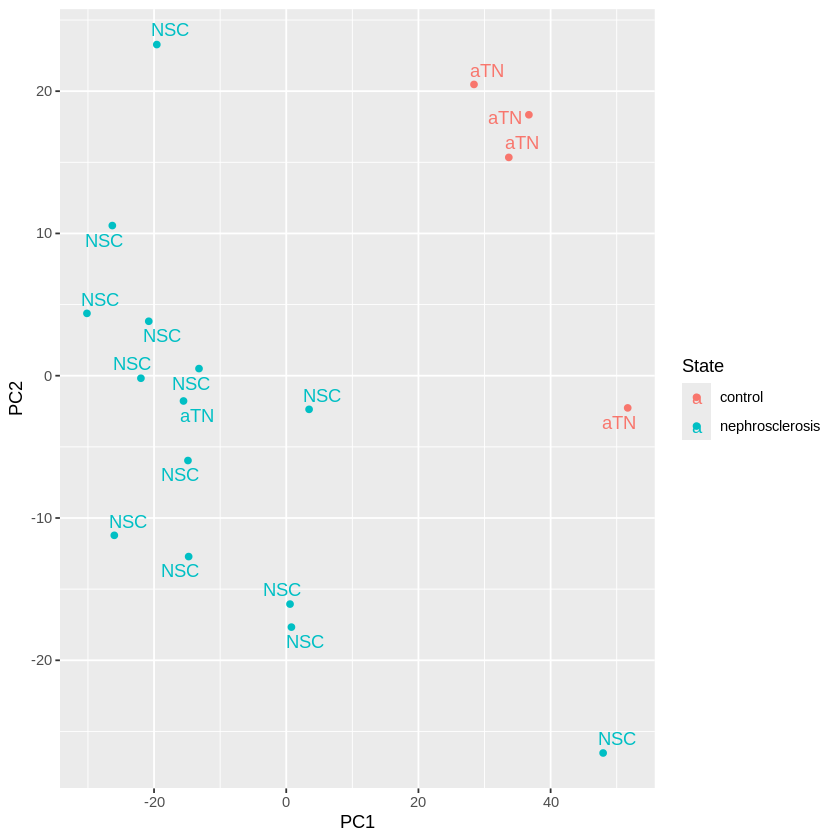

In [24]:
## MAKE SURE TO TRANSPOSE THE EXPRESSION MATRIX

pca <- prcomp(t(exprs(gse)))

## Join the PCs to the sample information
cbind(sampleInfo, pca$x) %>%
    ggplot(aes(x = PC1, y=PC2, col=State,label=paste("", Sample))) + geom_point() + geom_text_repel()

### O que acontece se identificarmos um efeito de lote (*batch effect*)?

Nada nesta fase. Desde que o desenho experimental seja sensato (ou seja, representantes de todos os grupos de amostras estão presentes em cada lote), podemos corrigir o lote quando executamos a análise de expressão diferencial.

### O que acontece se detectarmos outliers?

Se suspeitarmos que algumas amostras são outliers, podemos removê-las para análise posterior.

>***Atenção***
>
>Não precisa executar o código abaixo se você não tiver detectado *outliers*.

In [ ]:
### CODE ONLY FOR DEMONSTRATION ONLY

### lets' say are outliers are samples 1,2 and 3
## replace 1,2,3 with the outliers in your dataset
#outlier_samples <- c(1,2,3)

#gse <- gse[,-outlier_samples]

## Exportando os dados

Podemos exportar os dados de expressão para um `csv` para inspeção no Excel usando a função `write_csv` do `readr`. Os próprios valores de expressão provavelmente não serão muito úteis, pois serão nomeados de acordo com o ID do fabricante em vez do nome do gene (por exemplo). Podemos criar uma matriz juntando a matriz de expressão com a anotação de recursos.

In [25]:
library(readr)
full_output <- cbind(fData(gse),exprs(gse))
write_csv(full_output, file="gse_full_output.csv")

A anotação do GEO pode conter muitas colunas que não nos interessam. Para manter os dados mais organizados, podemos usar a função `select` para imprimir apenas colunas específicas na saída.

In [26]:
features <- fData(gse)
View(features)

ID                       GB_ACC    SPOT_ID  
1007_s_at                1007_s_at                U48705             
1053_at                  1053_at                  M87338             
117_at                   117_at                   X51757             
121_at                   121_at                   X69699             
1255_g_at                1255_g_at                L36861             
1294_at                  1294_at                  L13852             
1316_at                  1316_at                  X55005             
1320_at                  1320_at                  X79510             
1405_i_at                1405_i_at                M21121             
1431_at                  1431_at                  J02843             
1438_at                  1438_at                  X75208             
1487_at                  1487_at                  L38487             
1494_f_at                1494_f_at                M33318             
1598_g_at                1598_g_at                L13720             
160020_at                160020_at                Z48481             
1729_at                  1729_at                  L41690             
1773_at                  1773_at                  L00635             
177_at                   177_at                   U38545             
179_at                   179_at                   U38980             
1861_at                  1861_at                  U66879             
200000_s_at              200000_s_at              NM_006445          
200001_at                200001_at                NM_001749          
200002_at                200002_at                NM_007209          
200003_s_at              200003_s_at              NM_000991          
200004_at                200004_at                NM_001418          
200005_at                200005_at                NM_003753          
200006_at                200006_at                NM_007262          
200007_at                200007_at                NM_003134          
200008_s_at              200008_s_at              D13988             
200009_at                200009_at                NM_001494          
⋮                        ⋮                        ⋮         ⋮        
AFFX-r2-Bs-lys-3_at      AFFX-r2-Bs-lys-3_at                --Control
AFFX-r2-Bs-lys-5_at      AFFX-r2-Bs-lys-5_at                --Control
AFFX-r2-Bs-lys-M_at      AFFX-r2-Bs-lys-M_at                --Control
AFFX-r2-Bs-phe-3_at      AFFX-r2-Bs-phe-3_at                --Control
AFFX-r2-Bs-phe-5_at      AFFX-r2-Bs-phe-5_at                --Control
AFFX-r2-Bs-phe-M_at      AFFX-r2-Bs-phe-M_at                --Control
AFFX-r2-Bs-thr-3_s_at    AFFX-r2-Bs-thr-3_s_at              --Control
AFFX-r2-Bs-thr-5_s_at    AFFX-r2-Bs-thr-5_s_at              --Control
AFFX-r2-Bs-thr-M_s_at    AFFX-r2-Bs-thr-M_s_at              --Control
AFFX-r2-Ec-bioB-3_at     AFFX-r2-Ec-bioB-3_at               --Control
AFFX-r2-Ec-bioB-5_at     AFFX-r2-Ec-bioB-5_at               --Control
AFFX-r2-Ec-bioB-M_at     AFFX-r2-Ec-bioB-M_at               --Control
AFFX-r2-Ec-bioC-3_at     AFFX-r2-Ec-bioC-3_at               --Control
AFFX-r2-Ec-bioC-5_at     AFFX-r2-Ec-bioC-5_at               --Control
AFFX-r2-Ec-bioD-3_at     AFFX-r2-Ec-bioD-3_at               --Control
AFFX-r2-Ec-bioD-5_at     AFFX-r2-Ec-bioD-5_at               --Control
AFFX-r2-Hs18SrRNA-3_s_at AFFX-r2-Hs18SrRNA-3_s_at           --Control
AFFX-r2-Hs18SrRNA-5_at   AFFX-r2-Hs18SrRNA-5_at             --Control
AFFX-r2-Hs18SrRNA-M_x_at AFFX-r2-Hs18SrRNA-M_x_at           --Control
AFFX-r2-Hs28SrRNA-3_at   AFFX-r2-Hs28SrRNA-3_at             --Control
AFFX-r2-Hs28SrRNA-5_at   AFFX-r2-Hs28SrRNA-5_at             --Control
AFFX-r2-Hs28SrRNA-M_at   AFFX-r2-Hs28SrRNA-M_at             --Control
AFFX-r2-P1-cre-3_at      AFFX-r2-P1-cre-3_at                --Control
AFFX-r2-P1-cre-5_at      AFFX-r2-P1-cre-5_at                --Control
AFFX-ThrX-3_at           AFFX-ThrX-3_at                     --Control
AFFX-ThrX-5_at           AFFX-ThrX-

Inspecione as colunas e selecione as que lhe interessa. Nesse caso, escolheremos as colunas: `GB_ACC`, `Sequence Source`, `Gene Symbol`, `ENTREZ_GENE_ID` e `RefSeq Transcript ID`.

In [28]:
### Look at the features data frame and decide the names of the columns you want to keep
features <- select(features,"GB_ACC", "Sequence Source", "Gene Symbol", "ENTREZ_GENE_ID", "RefSeq Transcript ID")
full_output <- cbind(features,exprs(gse))
write_csv(full_output, file="gse_full_output.csv")

## Expressão Diferencial

De longe, o pacote mais popular para realizar expressão diferencial é o `limma`. O guia do usuário é extenso e cobre a teoria por trás da análise e muitos casos de uso [(Capítulos 9 e 17 para dados de canal único, como Illumina e Affymetrix)](https://bioconductor.org/packages/release/bioc/vignettes/limma/inst/doc/usersguide.pdf)

Crucialmente, temos que alocar as amostras em nosso conjunto de dados para os grupos de amostras de interesse. Uma função útil é `model.matrix`, que criará uma matriz de design a partir de uma das colunas em seu `sampleInfo`. Aqui escolheremos `sampleInfo$State`.

A matriz de design é uma matriz de 0s e 1s; uma linha para cada amostra e uma coluna para cada grupo de amostras. Um 1 em uma linha e coluna específicas indica que uma determinada amostra (a linha) pertence a um determinado grupo (coluna).

In [29]:
library(limma)
design <- model.matrix(~0+sampleInfo$State)
design


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




sampleInfo$Statecontrol sampleInfo$Statenephrosclerosis
1  0                       1                              
2  0                       1                              
3  0                       1                              
4  0                       1                              
5  0                       1                              
6  0                       1                              
7  0                       1                              
8  0                       1                              
9  0                       1                              
10 0                       1                              
11 0                       1                              
12 0                       1                              
13 0                       1                              
14 0                       1                              
15 1                       0                              
16 1                       0                              
17 1                       0                              
18 1                       0

As colunas acima estão com o nome muito complexo. Vamos simplificá-lo usando o comando abaixo:

In [30]:
## the column names are a bit ugly, so we will rename
colnames(design) <- c("Control","Nephrosclerosis")
design

Control Nephrosclerosis
1  0       1              
2  0       1              
3  0       1              
4  0       1              
5  0       1              
6  0       1              
7  0       1              
8  0       1              
9  0       1              
10 0       1              
11 0       1              
12 0       1              
13 0       1              
14 0       1              
15 1       0              
16 1       0              
17 1       0              
18 1       0

O poder de detectar expressão diferencial pode ser melhorado se filtrarmos genes pouco expressos antes de realizar a análise. A maneira como se define um gene sendo expresso pode variar de experimento para experimento, então um limite que funcionará para todos os conjuntos de dados não é viável. Aqui consideramos que cerca de 50% dos genes não serão expressos e usamos o nível de expressão mediana como um limite.

In [31]:
summary(exprs(gse))

## calculate median expression level
cutoff <- median(exprs(gse))

## TRUE or FALSE for whether each gene is "expressed" in each sample
is_expressed <- exprs(gse) > cutoff

## Identify genes expressed in more than 2 samples

keep <- rowSums(is_expressed) > 2

## check how many genes are removed / retained.
table(keep)

## subset to just those expressed genes
gse <- gse[keep,]

   GSM517355        GSM517356        GSM517357        GSM517358     
 Min.   : 3.597   Min.   : 3.616   Min.   : 3.630   Min.   : 3.660  
 1st Qu.: 5.870   1st Qu.: 5.888   1st Qu.: 5.952   1st Qu.: 5.914  
 Median : 7.252   Median : 7.261   Median : 7.271   Median : 7.258  
 Mean   : 7.509   Mean   : 7.502   Mean   : 7.529   Mean   : 7.507  
 3rd Qu.: 8.996   3rd Qu.: 8.946   3rd Qu.: 8.930   3rd Qu.: 8.922  
 Max.   :14.394   Max.   :14.425   Max.   :14.390   Max.   :14.436  
   GSM517359        GSM517360        GSM517361        GSM517362     
 Min.   : 3.632   Min.   : 3.639   Min.   : 3.556   Min.   : 3.526  
 1st Qu.: 5.842   1st Qu.: 5.916   1st Qu.: 5.885   1st Qu.: 5.833  
 Median : 7.255   Median : 7.274   Median : 7.266   Median : 7.249  
 Mean   : 7.495   Mean   : 7.503   Mean   : 7.503   Mean   : 7.496  
 3rd Qu.: 8.971   3rd Qu.: 8.911   3rd Qu.: 8.950   3rd Qu.: 8.984  
 Max.   :14.435   Max.   :14.397   Max.   :14.395   Max.   :14.412  
   GSM517363        GSM517364     

keep
FALSE  TRUE 
10041 12242 

A função `lmFit` é usada para ajustar o modelo aos dados. O resultado disso é estimar o nível de expressão em cada um dos grupos que especificamos.

In [32]:
fit <- lmFit(exprs(gse), design)
head(fit$coefficients)

Control   Nephrosclerosis
1007_s_at 11.096270 10.937513      
121_at    11.440960 10.540703      
1294_at    8.771636  9.065209      
1405_i_at  6.321916  6.865027      
1487_at    8.577031  8.279861      
1494_f_at  7.412815  7.180977

Para realizar a análise diferencial, temos que definir o contraste de nosso interesse. No nosso caso, temos apenas dois grupos e um contraste de interesse. Múltiplos contrastes podem ser definidos na função `makeContrasts`.

In [33]:
contrasts <- makeContrasts(Nephrosclerosis - Control, levels=design)

## can define multiple contrasts
## e.g. makeContrasts(Group1 - Group2, Group2 - Group3,....levels=design)

fit2 <- contrasts.fit(fit, contrasts)

Finalmente, aplique o passo de Bayes empírico para obter as estatísticas de expressão diferencial e valores-p.

In [34]:
fit2 <- eBayes(fit2)

Normalmente, damos nossa primeira olhada nos resultados usando o comando `topTable`. Isso nos fornece uma tabela dos genes mais diferencialmente expressos, juntamente com estatísticas associadas.

In [35]:
topTable(fit2)

logFC      AveExpr   t          P.Value      adj.P.Val    B        
204220_at    1.2338294  9.241031  10.719353 1.821613e-09 1.333217e-05 11.801993
201693_s_at -1.7042057  7.413416 -10.602572 2.178104e-09 1.333217e-05 11.637477
202659_at    1.0187782  9.643952   9.764569 8.201093e-09 2.185198e-05 10.407000
201694_s_at -2.7719768  9.824949  -9.610962 1.054693e-08 2.185198e-05 10.171632
200653_s_at  0.7697343  9.010519   9.522224 1.221193e-08 2.185198e-05 10.034232
202303_x_at  0.6836935  8.636306   9.463128 1.347102e-08 2.185198e-05  9.942143
208743_s_at  0.9388022  9.434581   9.438272 1.404038e-08 2.185198e-05  9.903269
209572_s_at  1.1675780  8.599309   9.407221 1.478706e-08 2.185198e-05  9.854590
213620_s_at  1.6759957 12.002049   9.302027 1.763959e-08 2.185198e-05  9.688704
213139_at    1.4177989 10.048226   9.294983 1.785001e-08 2.185198e-05  9.677543

A função `topTable` exibe automaticamente os resultados para o primeiro contraste. Se você quiser ver resultados para outros contrastes, você pode especificar o contraste de interesse como um argumento para a função topTable. Por exemplo, se você tiver um segundo contraste que você gostaria de ver, você pode usar `topTable(fit, coef=2)`, onde `fit` é o objeto ajustado do `limma` e `coef=2` especifica o segundo contraste. Lembre-se de que a contagem de coeficientes começa em 1 para o primeiro contraste.

Portanto, só execute os comandos abaixo se você tiver mais de um contraste.

In [ ]:
topTable(fit2, coef=1)
### to see the results of the second contrast (if it exists)
## topTable(fit2, coef=2)

A função `decideTests` é muito útil para determinar o número geral de genes diferencialmente expressos. Ela retorna uma matriz com os mesmos genes e contrastes que o objeto ajustado, mas cada entrada é -1, 0 ou 1. Um -1 indica que o gene é significativamente subexpresso (*downregulated*) no contraste correspondente, um 1 indica que o gene é significativamente superexpresso (*upregulated), e um 0 indica que não há evidência de expressão diferencial para esse gene no contraste correspondente. Você pode somar o número de -1s e 1s para obter o número total de genes diferencialmente expressos.

In [36]:
decideTests(fit2)

Nephrosclerosis - Control
1007_s_at                    0                       
121_at                      -1                       
1294_at                      0                       
1405_i_at                    0                       
1487_at                     -1                       
1494_f_at                   -1                       
1598_g_at                    1                       
160020_at                   -1                       
1729_at                      0                       
179_at                      -1                       
1861_at                      1                       
200000_s_at                  0                       
200001_at                    0                       
200002_at                    1                       
200003_s_at                  1                       
200004_at                    1                       
200005_at                    1                       
200006_at                    0                       
200007_at                    0                       
200008_s_at                  0                       
200009_at                    0                       
200010_at                    0                       
200011_s_at                  0                       
200012_x_at                  0                       
200013_at                    0                       
200014_s_at                  1                       
200015_s_at                  0                       
200016_x_at                  0                       
200017_at                    0                       
200018_at                    0                       
⋮                           ⋮                        
AFFX-HSAC07/X00351_5_at      0                       
AFFX-HSAC07/X00351_M_at      0                       
AFFX-hum_alu_at             -1                       
AFFX-HUMGAPDH/M33197_3_at    0                       
AFFX-HUMGAPDH/M33197_5_at    0                       
AFFX-HUMGAPDH/M33197_M_at    0                       
AFFX-HUMISGF3A/M97935_3_at   0                       
AFFX-HUMISGF3A/M97935_MA_at  0                       
AFFX-HUMISGF3A/M97935_MB_at  0                       
AFFX-HUMRGE/M10098_3_at      0                       
AFFX-HUMRGE/M10098_5_at      1                       
AFFX-HUMRGE/M10098_M_at      0                       
AFFX-M27830_3_at             0                       
AFFX-M27830_5_at            -1                       
AFFX-M27830_M_at            -1                       
AFFX-r2-Ec-bioB-3_at         0                       
AFFX-r2-Ec-bioB-5_at         0                       
AFFX-r2-Ec-bioB-M_at         0                       
AFFX-r2-Ec-bioC-3_at         0                       
AFFX-r2-Ec-bioC-5_at         0                       
AFFX-r2-Ec-bioD-3_at         0                       
AFFX-r2-Ec-bioD-5_at         0                       
AFFX-r2-Hs18SrRNA-3_s_at     0                       
AFFX-r2-Hs18SrRNA-5_at       1                       
AFFX-r2-Hs18SrRNA-M_x_at     0                       
AFFX-r2-Hs28SrRNA-3_at       0                       
AFFX-r2-Hs28SrRNA-5_at       0                       
AFFX-r2-Hs28SrRNA-M_at       0                       
AFFX-r2-P1-cre-3_at          0                       
AFFX-r2-P1-cre-5_at          0

Para ver os totais, só executar o comando abaixo:

In [37]:
table(decideTests(fit2))


  -1    0    1 
1380 8185 2677 

### Lidando com os *outliers*

É tentador descartar quaisquer arrays que pareçam ser *outliers* antes das expressões diferenciais. No entanto, isso é feito à custa do tamanho da amostra, o que pode ser um problema para pequenos experimentos. Um compromisso, que tem se mostrado eficaz, é calcular pesos para definir a confiabilidade de cada amostra ([Ritchie et al. 2006](http://www.biomedcentral.com/1471-2105/7/261)).

A função `arrayWeights` atribuirá uma pontuação a cada amostra; com um valor de 1 implicando peso igual. Amostras com pontuação menor que 1 são rebaixadas, e amostras com pontuações maiores que 1 são valorizadas. Portanto, nenhuma amostra realmente precisa ser removida, pelo menos não nessa série exemplo.

Só execute as próximas duas células com código se você quiser adicionar pesos a função.

In [ ]:
## calculate relative array weights
# aw <- arrayWeights(exprs(gse),design)
# aw

A função `lmfit` aceita esses pesos, e o resto do código pode ser excutado da mesma forma que acima.

In [ ]:
# fit <- lmFit(exprs(gse), design,
#             weights = aw)
# contrasts <- makeContrasts(Nephrosclerosis - Control, levels=design)
# fit2 <- contrasts.fit(fit, contrasts)
# fit2 <- eBayes(fit2)

## Processamento adicional e visualização dos resultados e da Expressão Diferencial (DE)

No momento, esses resultados não são particularmente fáceis de navegar, pois a única informação para identificar cada gene é o identificador que o fabricante do microarray atribuiu. Felizmente, a entrada GEO contém uma anotação extensa que podemos adicionar. Os dados de anotação podem ser recuperados com a função `fData` e restringimos às colunas de nosso interesse usando `select`.

***Para seus próprios dados, você terá que escolher as colunas que são de interesse para você. Provavelmente você não terá os mesmos cabeçalhos de coluna usados aqui.***

Uma vez que um quadro de dados de anotação foi criado, ele pode ser atribuído aos nossos resultados.

In [38]:
anno <- fData(gse)
anno

ID                          GB_ACC    SPOT_ID  
1007_s_at                   1007_s_at                   U48705             
121_at                      121_at                      X69699             
1294_at                     1294_at                     L13852             
1405_i_at                   1405_i_at                   M21121             
1487_at                     1487_at                     L38487             
1494_f_at                   1494_f_at                   M33318             
1598_g_at                   1598_g_at                   L13720             
160020_at                   160020_at                   Z48481             
1729_at                     1729_at                     L41690             
179_at                      179_at                      U38980             
1861_at                     1861_at                     U66879             
200000_s_at                 200000_s_at                 NM_006445          
200001_at                   200001_at                   NM_001749          
200002_at                   200002_at                   NM_007209          
200003_s_at                 200003_s_at                 NM_000991          
200004_at                   200004_at                   NM_001418          
200005_at                   200005_at                   NM_003753          
200006_at                   200006_at                   NM_007262          
200007_at                   200007_at                   NM_003134          
200008_s_at                 200008_s_at                 D13988             
200009_at                   200009_at                   NM_001494          
200010_at                   200010_at                   NM_000975          
200011_s_at                 200011_s_at                 NM_001659          
200012_x_at                 200012_x_at                 NM_000982          
200013_at                   200013_at                   NM_000986          
200014_s_at                 200014_s_at                 NM_004500          
200015_s_at                 200015_s_at                 NM_004404          
200016_x_at                 200016_x_at                 NM_002136          
200017_at                   200017_at                   NM_002954          
200018_at                   200018_at                   NM_001017          
⋮                           ⋮                           ⋮         ⋮        
AFFX-HSAC07/X00351_5_at     AFFX-HSAC07/X00351_5_at               --Control
AFFX-HSAC07/X00351_M_at     AFFX-HSAC07/X00351_M_at               --Control
AFFX-hum_alu_at             AFFX-hum_alu_at                       --Control
AFFX-HUMGAPDH/M33197_3_at   AFFX-HUMGAPDH/M33197_3_at             --Control
AFFX-HUMGAPDH/M33197_5_at   AFFX-HUMGAPDH/M33197_5_at             --Control
AFFX-HUMGAPDH/M33197_M_at   AFFX-HUMGAPDH/M33197_M_at             --Control
AFFX-HUMISGF3A/M97935_3_at  AFFX-HUMISGF3A/M97935_3_at            --Control
AFFX-HUMISGF3A/M97935_MA_at AFFX-HUMISGF3A/M97935_MA_at           --Control
AFFX-HUMISGF3A/M97935_MB_at AFFX-HUMISGF3A/M97935_MB_at           --Control
AFFX-HUMRGE/M10098_3_at     AFFX-HUMRGE/M10098_3_at               --Control
AFFX-HUMRGE/M10098_5_at     AFFX-HUMRGE/M10098_5_at               --Control
AFFX-HUMRGE/M10098_M_at     AFFX-HUMRGE/M10098_M_at               --Control
AFFX-M27830_3_at            AFFX-M27830_3_at                      --Control
AFFX-M27830_5_at            AFFX-M27830_5_at                      --Control
AFFX-M27830_M_at            AFFX-M27830_M_at                      --Control
AFFX-r2-Ec-bioB-3_at        AFFX-r2-Ec-bioB-3_at                  --Control
AFFX-r2-Ec-bioB-5_at        AFFX-r2-Ec-bioB-5_at                  --Control
AFFX-r2-Ec-bioB-M_at        AFFX-r2-Ec-bioB-M_at                  --Control
AFFX-r2-Ec-bioC-3_at        AFFX-r2-Ec-bioC-3_at                  --Control
AFFX-r2-Ec-bioC-5_at        AFFX-r2-Ec-bioC-5_at                  --Control
AFFX-r2-Ec-bioD-3_at        AFFX-r2-Ec-bioD-3_at                  --Control


Verifique e escolha as colunas que você deseja. Nesse caso iremos usar as seguintes colunas: `"GB_ACC"`, `"Gene Symbol"`, `"ENTREZ_GENE_ID"`, `"RefSeq Transcript ID"`.

In [39]:
anno <- select(anno, "GB_ACC", "Gene Symbol", "ENTREZ_GENE_ID", "RefSeq Transcript ID")
fit2$genes <- anno
topTable(fit2)

GB_ACC    Gene.Symbol               ENTREZ_GENE_ID     
204220_at   NM_004877 GMFG                      9535               
201693_s_at AV733950  EGR1                      1958               
202659_at   NM_002801 PSMB10                    5699               
201694_s_at NM_001964 EGR1                      1958               
200653_s_at M27319    CALM1 /// CALM2 /// CALM3 801 /// 805 /// 808
202303_x_at NM_003601 SMARCA5                   8467               
208743_s_at BC001359  YWHAB                     7529               
209572_s_at AF080227  EED                       8726               
213620_s_at AA126728  ICAM2                     3384               
213139_at   AI572079  SNAI2                     6591               
            RefSeq.Transcript.ID                                                                    
204220_at   NM_004877 /// XM_005259440                                                              
201693_s_at NM_001964                                                                               
202659_at   NM_002801                                                                               
201694_s_at NM_001964                                                                               
200653_s_at NM_001166106 /// NM_001743 /// NM_005184 /// NM_006888 /// XM_006720258                 
202303_x_at NM_003601                                                                               
208743_s_at NM_003404 /// NM_139323                                                                 
209572_s_at NM_003797 /// NM_152991 /// XM_005274373 /// XM_006718730 /// XM_006718731 /// XR_247215
213620_s_at NM_000873 /// NM_001099786 /// NM_001099787 /// NM_001099788 /// NM_001099789           
213139_at   NM_003068                                                                               
            logFC      AveExpr   t          P.Value      adj.P.Val    B        
204220_at    1.2338294  9.241031  10.719353 1.821613e-09 1.333217e-05 11.801993
201693_s_at -1.7042057  7.413416 -10.602572 2.178104e-09 1.333217e-05 11.637477
202659_at    1.0187782  9.643952   9.764569 8.201093e-09 2.185198e-05 10.407000
201694_s_at -2.7719768  9.824949  -9.610962 1.054693e-08 2.185198e-05 10.171632
200653_s_at  0.7697343  9.010519   9.522224 1.221193e-08 2.185198e-05 10.034232
202303_x_at  0.6836935  8.636306   9.463128 1.347102e-08 2.185198e-05  9.942143
208743_s_at  0.9388022  9.434581   9.438272 1.404038e-08 2.185198e-05  9.903269
209572_s_at  1.1675780  8.599309   9.407221 1.478706e-08 2.185198e-05  9.854590
213620_s_at  1.6759957 12.002049   9.302027 1.763959e-08 2.185198e-05  9.688704
213139_at    1.4177989 10.048226   9.294983 1.785001e-08 2.185198e-05  9.677543

A função *Volcano Plot* é uma maneira comum de visualizar os resultados de uma análise de DE. O eixo x mostra a mudança log-fold e o eixo y é alguma medida de significância estatística, que neste caso é o log-odds, ou estatística "B". Uma forma característica de "vulcão" deve ser vista.

Primeiro, criamos um quadro de dados que podemos visualizar no `ggplot2`. Especificar o argumento número para `topTable` cria uma tabela contendo resultados de teste de todos os genes. Também colocamos os IDs de sonda como uma coluna em vez de nomes de linha.

In [40]:
full_results <- topTable(fit2, number=Inf)
full_results <- tibble::rownames_to_column(full_results,"ID")

O gráfico básico é então criado com os comandos abaixo:

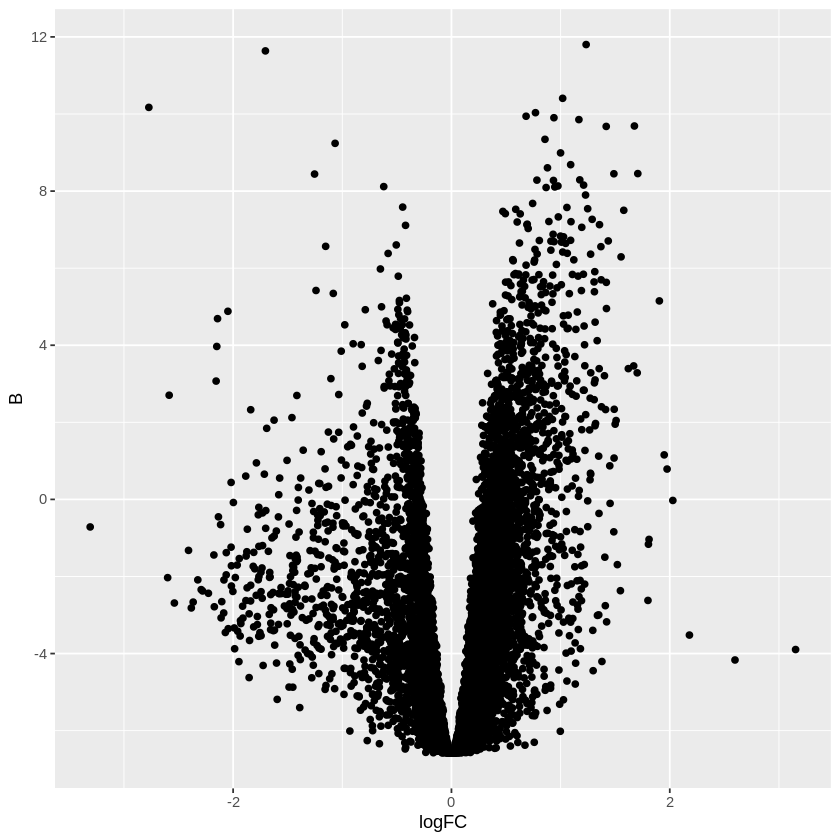

In [41]:
## Make sure you have ggplot2 loaded
library(ggplot2)
ggplot(full_results,aes(x = logFC, y=B)) + geom_point()

A flexibilidade do `ggplot2` nos permite rotular automaticamente pontos no gráfico que podem ser de interesse. Por exemplo, genes que atendem a um corte específico de valor-p e mudança de log-fold. Com o código abaixo, os valores de `p_cutoff` e `fc_cutoff` podem ser alterados conforme desejado.

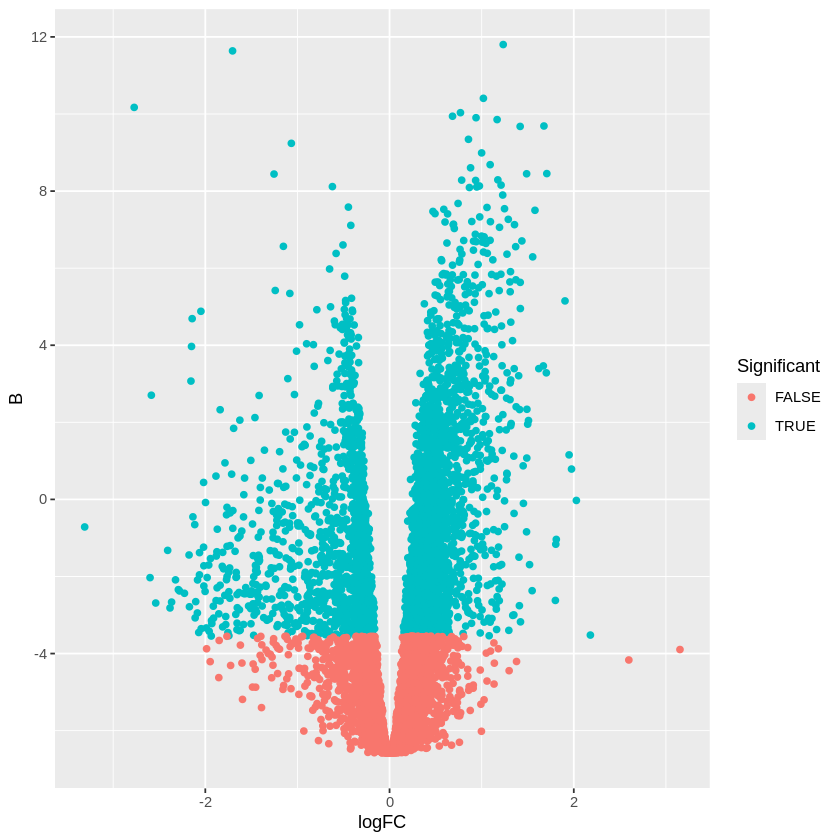

In [42]:
## change according to your needs
p_cutoff <- 0.05
fc_cutoff <- 1

full_results %>%
  mutate(Significant = adj.P.Val < p_cutoff, abs(logFC) > fc_cutoff ) %>%
  ggplot(aes(x = logFC, y = B, col=Significant)) + geom_point()

Além disso, podemos rotular a identidade de alguns genes. Abaixo, definimos um limite para os principais genes "N" que queremos rotular e rotulamos cada gene de acordo com seu Símbolo. Isso pode ser útil para identificar rapidamente genes de interesse em nosso gráfico.

Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


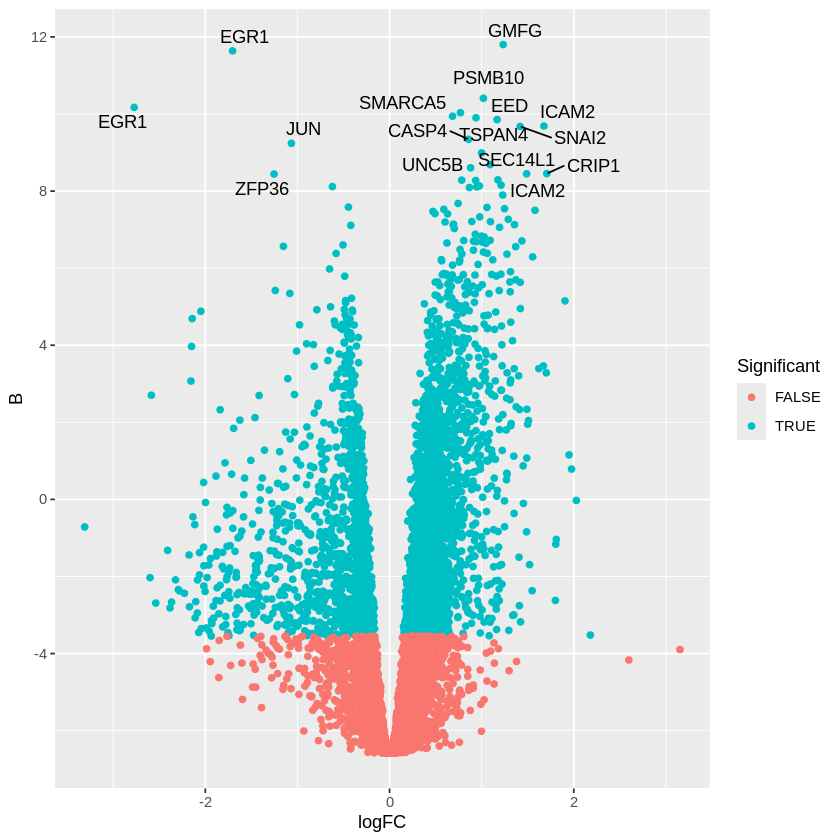

In [43]:
library(ggrepel)
p_cutoff <- 0.05
fc_cutoff <- 1
topN <- 20

full_results %>%
    mutate(Significant = adj.P.Val < p_cutoff, abs(logFC) > fc_cutoff ) %>%
    mutate(Rank = 1:n(), Label = ifelse(Rank < topN, Gene.Symbol,"")) %>%
    ggplot(aes(x = logFC, y = B, col=Significant,label=Label)) + geom_point() + geom_text_repel(col="black")

## Filtrando e exportando a tabela de resultados

A função filter do `dplyr` oferece uma maneira conveniente de interrogar a tabela de resultados.

In [44]:
## Get the results for particular gene of interest
filter(full_results, Gene.Symbol == "GATM")

ID          GB_ACC    Gene.Symbol ENTREZ_GENE_ID
1 216733_s_at X86401    GATM        2628          
2 203178_at   NM_001482 GATM        2628          
  RefSeq.Transcript.ID                                logFC     AveExpr  
1 NM_001482 /// XR_424635 /// XR_429525 /// XR_433091 -1.871770 10.902036
2 NM_001482 /// XR_424635 /// XR_429525 /// XR_433091 -1.530048  9.154392
  t         P.Value     adj.P.Val  B        
1 -3.237493 0.004360822 0.01962227 -2.294502
2 -3.013304 0.007184516 0.02751285 -2.766811

Ou com partes do nome:

In [45]:
## Get results for genes with TP53 in the name
filter(full_results, grepl("TP53", Gene.Symbol))

ID          GB_ACC    Gene.Symbol                                   
1  209917_s_at BC002709  TP53TG1                                       
2  203421_at   NM_006034 TP53I11                                       
3  216919_at   U79302    TP53I11                                       
4  203050_at   NM_005657 TP53BP1                                       
5  210241_s_at AB007458  TP53TG1                                       
6  203120_at   NM_005426 TP53BP2                                       
7  210886_x_at AB007457  TP53TG1                                       
8  213266_at   BF592982  TP53BP1                                       
9  220167_s_at NM_015369 TP53TG3 /// TP53TG3B /// TP53TG3C /// TP53TG3D
10 210609_s_at BC000474  TP53I3                                        
   ENTREZ_GENE_ID                        
1  11257                                 
2  9537                                  
3  9537                                  
4  7158                                  
5  11257                                 
6  7159                                  
7  11257                                 
8  7158                                  
9  24150 /// 653550 /// 729264 /// 729355
10 9540                                  
   RefSeq.Transcript.ID                                                                                                                                                                                                                                                                                  
1  NM_007233 /// NR_015381                                                                                                                                                                                                                                                                               
2  NM_001076787 /// NM_001258320 /// NM_001258321 /// NM_001258322 /// NM_001258323 /// NM_001258324 /// NM_006034 /// XM_005253227 /// XM_005253229 /// XM_006718387 /// XR_242833 /// XR_428864                                                                                                        
3  NM_001076787 /// NM_001258320 /// NM_001258321 /// NM_001258322 /// NM_001258323 /// NM_001258324 /// NM_006034 /// XM_005253227 /// XM_005253229 /// XM_006718387 /// XR_242833 /// XR_428864                                                                                                        
4  NM_001141979 /// NM_001141980 /// NM_005657 /// XM_005254634 /// XM_005254635 /// XM_006720666                                                                                                                                                                                                        
5  NM_007233 /// NR_015381                                                                                                                                                                                                                                                                               
6  NM_001031685 /// NM_005426 /// XM_005273246                                                                                                                                                                                                                                                           
7  NM_007233 /// NR_015381                                                                                                                                                                                                                                                                               
8  NM_001141979 /// NM_001141980 /// NM_005657 /// XM_005254634 /// XM_005254635 /// XM_006720666                                                                                                                                                                                                        
9  NM_001099687 /// NM_001205259 /// NM_001205260 /// NM_001205265 

Também podemos filtrar de acordo com os limites de valor-p (ajustado) e LogFC:

In [46]:
p_cutoff <- 0.05
fc_cutoff <- 1

filter(full_results, adj.P.Val < 0.05, abs(logFC) > 1)

ID          GB_ACC   
1   204220_at   NM_004877
2   201693_s_at AV733950 
3   202659_at   NM_002801
4   201694_s_at NM_001964
5   209572_s_at AF080227 
6   213620_s_at AA126728 
7   213139_at   AI572079 
8   201464_x_at BG491844 
9   202083_s_at AI017770 
10  205081_at   NM_001311
11  204683_at   NM_000873
12  201531_at   NM_003407
13  204975_at   NM_001424
14  210657_s_at U88870   
15  219243_at   NM_018326
16  219315_s_at NM_024600
17  218611_at   NM_016545
18  219134_at   NM_022159
19  209355_s_at AB000889 
20  205756_s_at NM_000132
21  203753_at   NM_003199
22  219436_s_at NM_016242
23  200760_s_at N92494   
24  208981_at   AA702701 
25  208983_s_at M37780   
26  220134_x_at NM_018166
27  221710_x_at BC006241 
28  201466_s_at NM_002228
29  204610_s_at NM_006848
30  204021_s_at NM_005859
⋮   ⋮           ⋮        
387 206343_s_at NM_013959
388 210343_s_at AF124373 
389 220135_s_at NM_014270
390 210402_at   U03884   
391 204981_at   NM_002555
392 221305_s_at NM_019076
393 206515_at   NM_000896
394 201562_s_at NM_003104
395 219796_s_at NM_021924
396 202833_s_at NM_000295
397 205750_at   NM_004332
398 204508_s_at BC001012 
399 219962_at   NM_021804
400 203924_at   NM_000846
401 206054_at   NM_000893
402 206172_at   NM_000640
403 210289_at   AB013094 
404 204130_at   NM_000196
405 205347_s_at NM_021992
406 208596_s_at NM_019093
407 220503_at   AF260824 
408 211416_x_at L20492   
409 205892_s_at NM_001443
410 209977_at   M74220   
411 215363_x_at AW168915 
412 204409_s_at BC005248 
413 203382_s_at NM_000041
414 206522_at   NM_004668
415 203477_at   NM_001855
416 215125_s_at AV691323 
    Gene.Symbol                                                                                    
1   GMFG                                                                                           
2   EGR1                                                                                           
3   PSMB10                                                                                         
4   EGR1                                                                                           
5   EED                                                                                            
6   ICAM2                                                                                          
7   SNAI2                                                                                          
8   JUN                                                                                            
9   SEC14L1                                                                                        
10  CRIP1                                                                                          
11  ICAM2                                                                                          
12  ZFP36                                                                                          
13  EMP2                                                                                           
14  SEPT4                                                                                          
15  GIMAP4                                                                                         
16  TMEM204                                                                                        
17  IER5                                                                                           
18  ELTD1                                                                                          
19  PPAP2B                                                                                         
20  F8                                                                                             
21  TCF4                                                                                           
22  EMCN                                                                                           
23  ARL6IP5                                                                                 

Esses resultados podem ser exportados com a função `write_csv`.

In [47]:
library(readr)
filter(full_results, adj.P.Val < 0.05, abs(logFC) > 1) %>%
  write_csv(path="filtered_de_results.csv")

# Visualização adicional

## Mapas de calor de genes selecionados

O R e o Bioconductor têm muitos pacotes para criar *heatmaps*. Os mais populares no momento são `ComplexHeatmap` e `pheatmap` (que usaremos aqui).

Criar o *heatmap* é bastante simples. Há uma função `pheatmap` dentro da biblioteca `pheatmap`, e ela só precisa saber a matriz de valores que você deseja plotar (digamos `gene_matrix`):

```R
### example code
library(pheatmap)
pheatmap(gene_matrix)
```
No entanto, existem muitas maneiras diferentes de construir essa matriz, dependendo do que você deseja visualizar no gráfico. Consideraremos algumas opções abaixo.

### Genes mais diferencialmente expressos

Já criamos uma tabela de resultados de expressão diferencial, que é classificada de acordo com a significância estatística.

Para visualizar os genes mais diferencialmente expressos, primeiro precisamos extrair o ID deles. Esses IDs devem corresponder às linhas na matriz de expressão.

No código abaixo, introduzimos uma nova coluna nos resultados que apenas atribui um número de linha a cada gene. Em seguida, filtramos para retornar dados para os principais resultados N. A função `pull` é usada para extrair a coluna ID como uma variável.

In [48]:
## Use to top 20 genes for illustration

topN <- 20
##
ids_of_interest <- mutate(full_results, Rank = 1:n()) %>%
  filter(Rank < topN) %>%
  pull(ID)

Para rotular o mapa de calor de maneira útil, extraímos os símbolos de genes correspondentes.

In [49]:
gene_names <- mutate(full_results, Rank = 1:n()) %>%
  filter(Rank < topN) %>%
  pull(Gene.Symbol)

Os valores de expressão para os IDs que recuperamos podem ser obtidos usando a notação [..] para indexar a matriz de expressão.

In [50]:
## Get the rows corresponding to ids_of_interest and all columns
gene_matrix <- exprs(gse)[ids_of_interest,]

Agora fazemos o mapa de calor. Um esquema de cores padrão é usado, mas pode ser alterado por meio dos argumentos. **Por favor, não use vermelho e verde. Não é acessível a todos.**

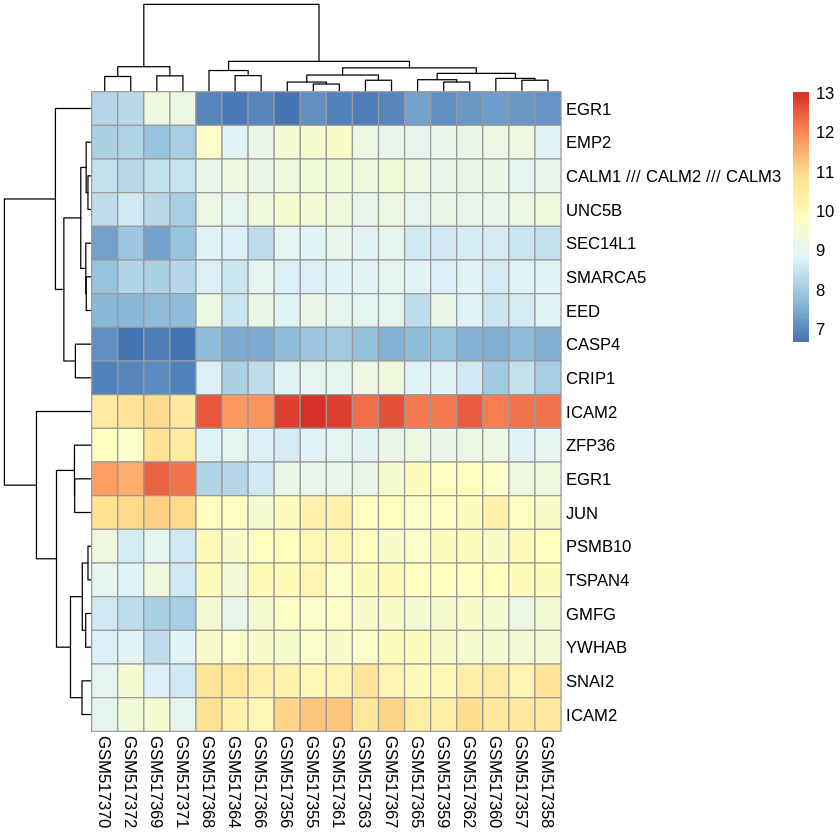

In [51]:
pheatmap(gene_matrix,
     labels_row = gene_names)

Muitas vezes é preferível escalar cada linha para destacar as diferenças em cada gene em todo o conjunto de dados.

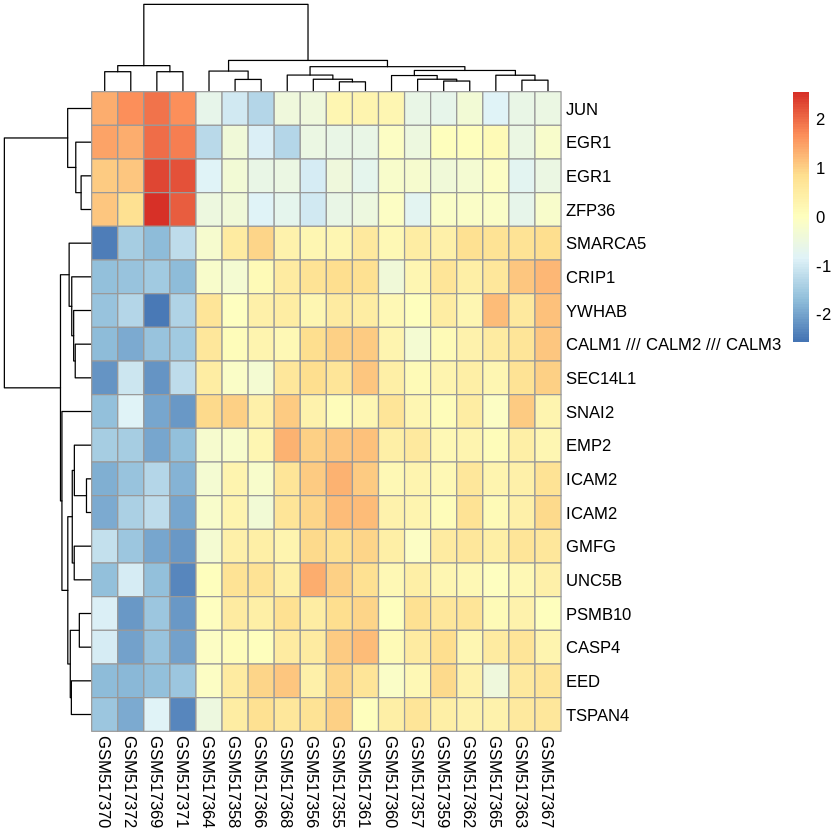

In [52]:
pheatmap(gene_matrix,
     labels_row = gene_names,
     scale="row")

Se você quiser anotar as amostras, só colocar:

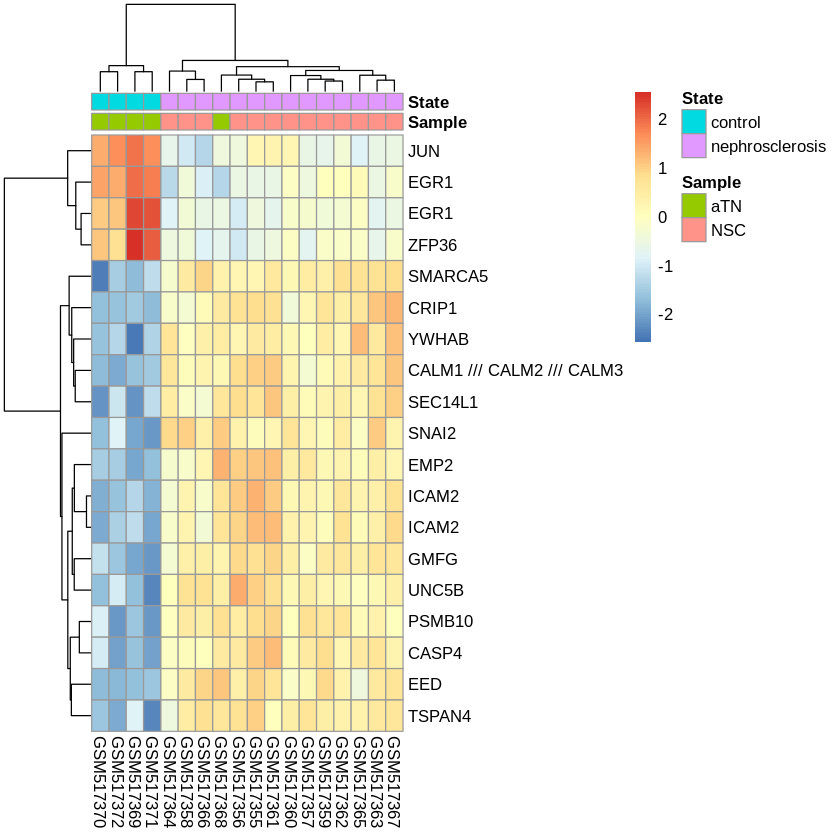

In [53]:
pheatmap(gene_matrix,
     labels_row = gene_names,
     scale="row", annotation_col=sampleInfo)

Agora as amostras controle estão bem separadas em relação as de Nefroesclerose (é bem provável que você não consiga visualizar, pois a parte gráfica do Colab/R não é muito boa).

>*Estou procurando formas de construir o heatmap em uma maior resolução, modificando o código de executar a figura. Deverá estar pronto em uma próxima atualização.*)

## Genes de interesse definidos pelo usuário

O procedimento é semelhante ao acima se você tem sua própria lista de genes (por exemplo, genes de um estudo anterior). A função `%in%` é usada para identificar linhas cujo `Symbol` corresponde a qualquer membro de `my_genes`. Aqui criamos `my_genes` manualmente. Se você quiser plotar os genes pertencentes a um termo GO específico, pode ser mais eficiente seguir a seção abaixo.

Dependendo da tecnologia utilizada, pode haver várias correspondências para um gene específico; então poderíamos acabar com mais IDs do que genes. Portanto, repetimos a filtragem e puxamos a coluna `Symbol` para garantir que possamos rotular as linhas do *heatmap*.

Usaremos os genes abaixo, mas fique a vontade para trocar os símbolos pelos genes que deseja verificar. Apenas lembre que os genes escolhidos podem não estar diferencialmente expressos, ou até mesmo serem expressos.

In [54]:
my_genes <- c("SLC2A4", "IGF1", "GATM", "SLC6A8", "AKT1", "AKT2", "AKT3", "PSMB5", "PSMD3", "SGK1", "PRPS1", "CKB", "CKM", "CKMT1A", "CKMT1B", "CKMT2", "SLC16A12")

Agora vamos criar um *dataframe* chamado `ids_of_interest` e vamos retirar os genes da tabela `full_results` que correspondem ao genes que estão descritos em `my_genes`:

In [55]:
ids_of_interest <-  filter(full_results,Gene.Symbol %in% my_genes) %>%
    pull(ID)
gene_names <-  filter(full_results,Gene.Symbol %in% my_genes) %>%
    pull(Gene.Symbol)

Agora construiremos a matriz para o *heatmap*:

In [56]:
gene_matrix <- exprs(gse)[ids_of_interest,]

E construiremos o *heatmap* da expressão desse genes de interesse, já usando a anotação das amostras presentes em `sampleInfo`:

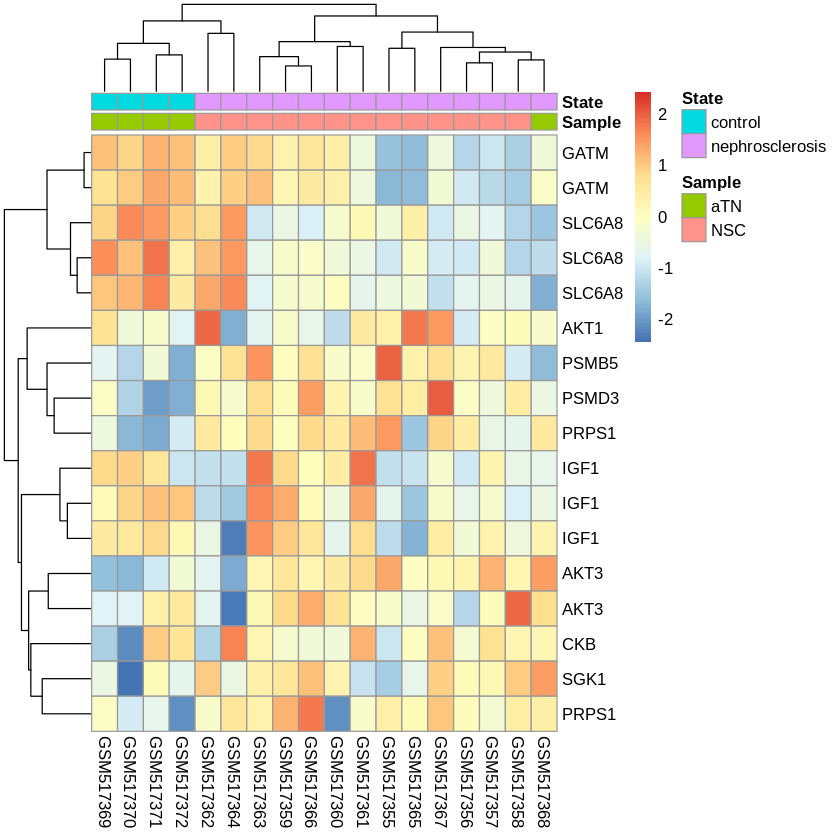

In [57]:
pheatmap(gene_matrix,
         labels_row = gene_names,
         scale="row", annotation_col=sampleInfo)

## Genes específicos de uma Via ou Processo metabólico

Existem pacotes de anotação do Bioconductor para vários organismos que permitem uma fácil conversão entre diferentes esquemas de ID. Neste caso de uso específico, podemos recuperar os nomes dos genes pertencentes a um determinado caminho.

Você pode verificar quais pacotes estão disponíveis na página do Bioconductor (procure pelos pacotes nomeados como org.XX.XX.db).

In [58]:
library(org.Hs.eg.db)

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



Attaching package: ‘IRanges’


The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice



Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select






Vamos selecionar o [GO:0006600](https://www.ebi.ac.uk/QuickGO/term/GO:0006600), que corresponde ao Metabolismo da Creatina.

In [59]:
anno <- AnnotationDbi::select(org.Hs.eg.db,
                              columns="SYMBOL",
                              keys="GO:0006600",
                              keytype="GO")
anno

'select()' returned 1:many mapping between keys and columns



GO         EVIDENCE ONTOLOGY SYMBOL
1 GO:0006600 TAS      BP       GAMT  
2 GO:0006600 IMP      BP       GATM  
3 GO:0006600 TAS      BP       SLC6A8
4 GO:0006600 IEA      BP       FKRP

Agora vamos atualizar a nossa lista `my_genes`como os genes que estejam associados a este GO:

In [60]:
my_genes <- pull(anno, SYMBOL)

Atualizaremos também a nossa lista `ids_of_interest`, filtrando a partir dos genes que estavam em `my_genes`. E depois iremos retirar os nomes desses genes.

In [61]:
ids_of_interest <-  filter(full_results,Gene.Symbol %in% my_genes) %>%
    pull(ID)

gene_names <-  filter(full_results,Gene.Symbol %in% my_genes) %>%
    pull(Gene.Symbol)

Agora é só criar a nova matriz e construir o *heatmap* com os genes que estão associados a essa ontologia:

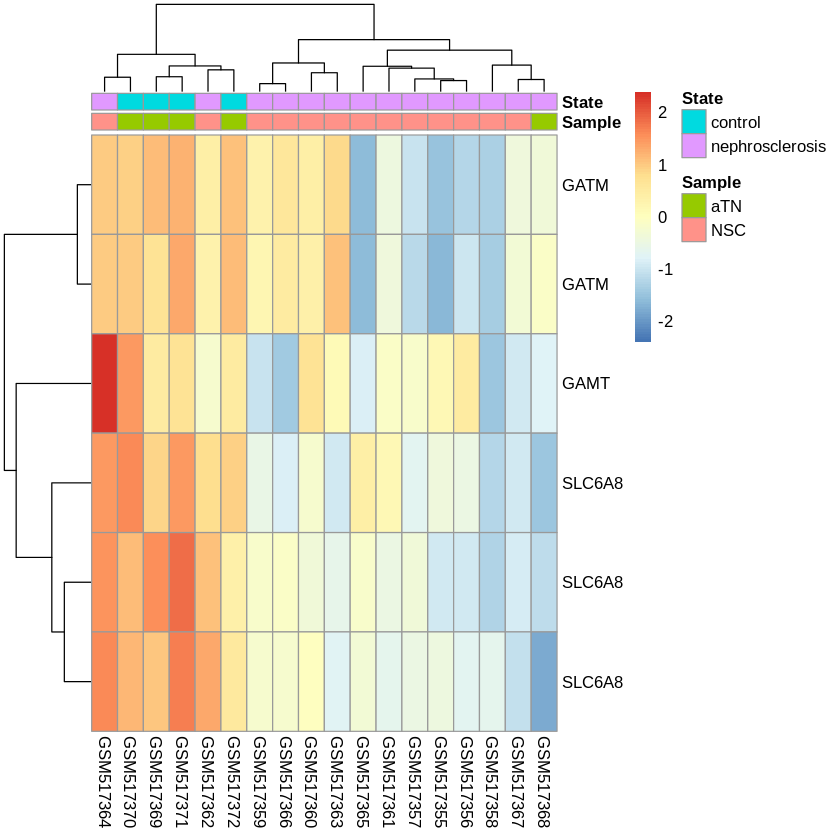

In [62]:
gene_matrix <- exprs(gse)[ids_of_interest,]
pheatmap(gene_matrix,
         labels_row = gene_names,
         scale="row", annotation_col=sampleInfo)

## Considerações finais

Há uma série de outras análises que podem ser realizadas e estão descritas no tutorial original. Não esqueça de citar ele, não esta versão, que tem fins apenas didáticos.